In [1]:
import ftplib
import pandas as pd
import numpy as np
import io
import time

In [2]:
main_df = pd.read_csv("no_copy_res_final.csv")

In [3]:
main_df

,organism_name,assembly_accession,refseq_category,excluded_from_refseq,bioproject,biosample,wgs_master,taxid,species_taxid,infraspecific_name,...,total_gene_count,protein_coding_gene_count,non_coding_gene_count,pubmed_id,Order/Family,Common Name,Wild,Capt.,M/F,Reference
0,Acinonyx jubatus,GCA_027475565.2,representative genome,na,PRJNA854353,SAMN29432198,JANJSO000000000.1,32536,32536,na,...,0.0,0.0,0.0,na,Felidae,Cheetah,NaN,19.0,x,[57] [101] [159]
1,Acomys cahirinus,GCA_029890205.1,representative genome,na,PRJNA783778,SAMN23453783,JAJTCZ000000000.1,10068,10068,na,...,0.0,0.0,0.0,35320043,Muridae,Spiny mouse,NaN,5.0,x,[101] [106] [158] [267]
2,Addax nasomaculatus,GCA_019593525.1,representative genome,na,PRJNA742532,SAMN19946357,JAIEZW000000000.1,59515,59515,na,...,0.0,0.0,0.0,na,Bovidae,Addax,NaN,19.0,x,[100]
3,Aepyceros melampus,GCA_006408695.1,representative genome,na,PRJNA438286,SAMN08714480,SJXQ00000000.1,9897,9897,na,...,0.0,0.0,0.0,31221828,,Impala,15.0,NaN,x,[100]
4,Ailuropoda melanoleuca,GCA_002007445.3,representative genome,na,PRJNA588422,SAMN04193337,LNAT00000000.2,9646,9646,na,...,0.0,0.0,0.0,28096377;31810476,Ailuropodidae,Giant panda,26.0,NaN,x,[21]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
293,Vulpes vulpes,GCA_003160815.1,representative genome,na,PRJNA378561,SAMN06553695,NBDQ00000000.1,9627,9627,strain=TameXAggressive cross,...,0.0,0.0,0.0,30082739,,Red fox,7.0,15.0,x,[1]
294,Xerus inauris,GCA_004024805.1,representative genome,na,PRJNA399425,SAMN07678119,PVHX00000000.1,234690,234690,na,...,0.0,0.0,0.0,na,,African ground squirrel (+),NaN,6.0,x,[229]
295,Zalophus californianus,GCA_009762305.2,representative genome,na,PRJNA559673,SAMN12368149,WPOA00000000.2,9704,9704,na,...,0.0,0.0,0.0,34097816,,California sea lion,17.0,NaN,x,[100]
296,Zapus hudsonius,GCA_004024765.1,representative genome,na,PRJNA399434,SAMN07678139,PVHP000000000.1,160400,160400,na,...,0.0,0.0,0.0,na,,Jumping mouse,NaN,5.0,x,[143]


In [4]:
main_df['ftp_path'][0]

'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/027/475/565/GCA_027475565.2_VMU_Ajub_asm_v1.0'

In [5]:
def transform_link(link):
    transformed_link = link.split("https://ftp.ncbi.nlm.nih.gov")[1]
    #return f"'{transformed_link}'"
    return transformed_link


# Пример использования
link = "https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/027/475/565/GCA_027475565.2_VMU_Ajub_asm_v1.0"
transformed_link = transform_link(link)
print(transformed_link)

/genomes/all/GCA/027/475/565/GCA_027475565.2_VMU_Ajub_asm_v1.0


In [6]:
import ftplib
import pandas as pd
import io

# Устанавливаем соединение с FTP сервером
ftp = ftplib.FTP('ftp.ncbi.nlm.nih.gov')
ftp.login()
link = main_df['ftp_path'][0]
print(link)
# Переходим в нужную директорию на FTP сервере
transformed_link = transform_link(link)
print(transformed_link)
print('/genomes/all/GCA/027/475/565/GCA_027475565.2_VMU_Ajub_asm_v1.0')
ftp.cwd((transformed_link))
        #'/genomes/all/GCA/027/475/565/GCA_027475565.2_VMU_Ajub_asm_v1.0'
file_list = ftp.nlst()  # Получаем список файлов в текущей директории

# Ищем файл с именем, содержащим 'assembly_stats'
assembly_stats_file = [f for f in file_list if 'assembly_stats' in f][0]  # Получаем имя файла

data = io.BytesIO()
ftp.retrbinary('RETR ' + assembly_stats_file, data.write)
data.seek(0)
df = pd.read_csv(data, sep='\t', comment="#", header=None)

print(df)

ftp.quit()

https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/027/475/565/GCA_027475565.2_VMU_Ajub_asm_v1.0
/genomes/all/GCA/027/475/565/GCA_027475565.2_VMU_Ajub_asm_v1.0
/genomes/all/GCA/027/475/565/GCA_027475565.2_VMU_Ajub_asm_v1.0
               0    1              2                     3                4   
0            all  all            all                   all     total-length  \
1            all  all            all                   all     spanned-gaps   
2            all  all            all                   all   unspanned-gaps   
3            all  all            all                   all     region-count   
4            all  all            all                   all   scaffold-count   
..           ...  ...            ...                   ...              ...   
459  non-nuclear   MT  Mitochondrion  unlocalized-scaffold  ungapped-length   
460  non-nuclear   MT  Mitochondrion  unlocalized-scaffold   scaffold-count   
461  non-nuclear   MT  Mitochondrion  unlocalized-scaffold     scaffold-

'221 Goodbye.'

In [7]:
list1 = []
for i in range (17):
    list1.append(df[4][i])
print(list1)

for col_name in list1:
    main_df[col_name] = None

main_df.loc[0, list1] = df.iloc[:17, 5].values    
    
print(main_df)
#print(len(main_df))

['total-length', 'spanned-gaps', 'unspanned-gaps', 'region-count', 'scaffold-count', 'scaffold-N50', 'scaffold-L50', 'scaffold-N75', 'scaffold-N90', 'contig-count', 'contig-N50', 'contig-L50', 'total-gap-length', 'molecule-count', 'top-level-count', 'component-count', 'gc-perc']
              organism_name assembly_accession        refseq_category   
0          Acinonyx jubatus    GCA_027475565.2  representative genome  \
1          Acomys cahirinus    GCA_029890205.1  representative genome   
2       Addax nasomaculatus    GCA_019593525.1  representative genome   
3        Aepyceros melampus    GCA_006408695.1  representative genome   
4    Ailuropoda melanoleuca    GCA_002007445.3  representative genome   
..                      ...                ...                    ...   
293           Vulpes vulpes    GCA_003160815.1  representative genome   
294           Xerus inauris    GCA_004024805.1  representative genome   
295  Zalophus californianus    GCA_009762305.2  representative 

In [8]:
ftp = ftplib.FTP('ftp.ncbi.nlm.nih.gov')
#ftp.login()
for i in range (1, len(main_df)):
    ftp = ftplib.FTP('ftp.ncbi.nlm.nih.gov')
    ftp.login()
    link = main_df['ftp_path'][i]
    print(link, i)
    # Переходим в нужную директорию на FTP сервере
    transformed_link = transform_link(link)
    #print(transformed_link)
    ftp.cwd((transformed_link))
    file_list = ftp.nlst()
    
    assembly_stats_file = [f for f in file_list if 'assembly_stats' in f][0]  
    
    data = io.BytesIO()
    # for i in range (10):
    #     try:
    #         ftp.retrbinary('RETR ' + assembly_stats_file, data.write)
    #         break
    #     except EOFError as resp:
    #         if (i == 9):
    #             raise EOFError
    #         print("End of file, reconnecting to ftp")
    #         ftp.quit()
    #         ftp = ftplib.FTP('ftp.ncbi.nlm.nih.gov')
    #         ftp.login()
    ftp.retrbinary('RETR ' + assembly_stats_file, data.write)
    data.seek(0)
    df = pd.read_csv(data, sep='\t', comment="#", header=None)
    main_df.loc[i, list1] = df.iloc[:17, 5].values
    ftp.quit()
    
    #if i % 80 == 0:
    #    print("Sleeping....")
    #    time.sleep(5)
#ftp.quit()

https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/029/890/205/GCA_029890205.1_ASM2989020v1 1
https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/019/593/525/GCA_019593525.1_ASM1959352v1 2
https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/006/408/695/GCA_006408695.1_IMP 3
https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/007/445/GCA_002007445.3_ASM200744v3 4
https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/006/408/545/GCA_006408545.1_HBT 5
https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/015/832/495/GCA_015832495.2_NRM_Aalces_2_0.fsa 6
https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/963/574/245/GCA_963574245.1_PGDP_AllNig 7
https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/963/575/295/GCA_963575295.1_PGDP_AloCar 8
https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/004/027/835/GCA_004027835.1_AloPal_v1_BIUU 9
https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/016/432/865/GCA_016432865.2_AdamAnt_v2 10
https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/016/696/395/GCA_016696395.1_USYD_AStu_M 11
https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/0

In [50]:
main_df
file_path = 'new_res.csv'
main_df.to_csv(file_path, index=False)

In [130]:
main_df = pd.read_csv("new_res.csv")

In [131]:
main_df

,organism_name,assembly_accession,refseq_category,excluded_from_refseq,bioproject,biosample,wgs_master,taxid,species_taxid,infraspecific_name,...,scaffold-N75,scaffold-N90,contig-count,contig-N50,contig-L50,total-gap-length,molecule-count,top-level-count,component-count,gc-perc
0,Acinonyx jubatus,GCA_027475565.2,representative genome,na,PRJNA854353,SAMN29432198,JANJSO000000000.1,32536,32536,na,...,113113550.0,82195870.0,218.0,96827784.0,9.0,4400.0,20.0,196.0,196.0,4.150000e+01
1,Acomys cahirinus,GCA_029890205.1,representative genome,na,PRJNA783778,SAMN23453783,JAJTCZ000000000.1,10068,10068,na,...,121900037.0,87318440.0,123.0,55022522.0,18.0,8900.0,19.0,34.0,34.0,4.300000e+01
2,Addax nasomaculatus,GCA_019593525.1,representative genome,na,PRJNA742532,SAMN19946357,JAIEZW000000000.1,59515,59515,na,...,10109397.0,2270090.0,284495.0,17026.0,42125.0,350588786.0,0.0,86923.0,86923.0,4.150000e+01
3,Aepyceros melampus,GCA_006408695.1,representative genome,na,PRJNA438286,SAMN08714480,SJXQ00000000.1,9897,9897,na,...,204316.0,112117.0,81980.0,82459.0,9285.0,31894453.0,0.0,24102.0,24102.0,4.200000e+01
4,Ailuropoda melanoleuca,GCA_002007445.3,representative genome,na,PRJNA588422,SAMN04193337,LNAT00000000.2,9646,9646,na,...,92459488.0,38124791.0,122819.0,127687.0,5332.0,46690237.0,21.0,73513.0,73513.0,4.150000e+01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
293,Vulpes vulpes,GCA_003160815.1,representative genome,na,PRJNA378561,SAMN06553695,NBDQ00000000.1,9627,9627,strain=TameXAggressive cross,...,6581197.0,2648410.0,183897.0,55450.0,12033.0,71544353.0,0.0,82423.0,82423.0,4.100000e+01
294,Xerus inauris,GCA_004024805.1,representative genome,na,PRJNA399425,SAMN07678119,PVHX00000000.1,234690,234690,na,...,31010.0,4919.0,587115.0,64054.0,10993.0,974500.0,0.0,577370.0,577370.0,2.601418e+09
295,Zalophus californianus,GCA_009762305.2,representative genome,na,PRJNA559673,SAMN12368149,WPOA00000000.2,9704,9704,na,...,113586643.0,94255706.0,230.0,32626160.0,23.0,18537762.0,20.0,47.0,47.0,4.150000e+01
296,Zapus hudsonius,GCA_004024765.1,representative genome,na,PRJNA399434,SAMN07678139,PVHP000000000.1,160400,160400,na,...,6286.0,713.0,1165710.0,23350.0,28152.0,761000.0,0.0,1158100.0,1158100.0,2.611190e+09


In [132]:
main_df['assembly_level'].value_counts()
#counts = cleaned_df['organism_name'].value_counts()

assembly_level
Scaffold      159
Chromosome    125
Contig         14
Name: count, dtype: int64

In [133]:
main_df = main_df.drop('gc-perc', axis=1)

In [134]:
counter = 0
print('Статистика для contig-ов', '\n')
for i in range (len(main_df)):
    if (main_df['assembly_level'][i] == 'Contig'):
        print(counter ,'contig-count', main_df['contig-count'][i], 'contig-N50',main_df['contig-N50'][i])
        counter += 1
        #main_df['organism_name'][i],

Статистика для contig-ов 

0 contig-count 212.0 contig-N50 212.0
1 contig-count 2079.0 contig-N50 2079.0
2 contig-count 2701.0 contig-N50 2701.0
3 contig-count 4898.0 contig-N50 4898.0
4 contig-count 3586.0 contig-N50 3586.0
5 contig-count 1809.0 contig-N50 1809.0
6 contig-count 2118.0 contig-N50 2118.0
7 contig-count 6993.0 contig-N50 6993.0
8 contig-count 3047.0 contig-N50 3047.0
9 contig-count 1906.0 contig-N50 1906.0
10 contig-count 1360.0 contig-N50 1360.0
11 contig-count 1309164.0 contig-N50 1309164.0
12 contig-count 497.0 contig-N50 497.0
13 contig-count 841006.0 contig-N50 841006.0


In [135]:
counter = 0
print('Статистика для scaffold-ов', '\n')
for i in range (len(main_df)):
    if (main_df['assembly_level'][i] == 'Scaffold'):
        print(counter, 'Scaffold-count', main_df['scaffold-count'][i], 'Scaffold-N50',main_df['scaffold-N50'][i])
        counter += 1
        #main_df['organism_name'][i],

Статистика для scaffold-ов 

0 Scaffold-count 86923.0 Scaffold-N50 20757513.0
1 Scaffold-count 24102.0 Scaffold-N50 344542.0
2 Scaffold-count 539659.0 Scaffold-N50 12034.0
3 Scaffold-count 5939.0 Scaffold-N50 76655859.0
4 Scaffold-count 137434.0 Scaffold-N50 45084.0
5 Scaffold-count 182811.0 Scaffold-N50 32393.0
6 Scaffold-count 1136565.0 Scaffold-N50 72427.0
7 Scaffold-count 30796.0 Scaffold-N50 72733491.0
8 Scaffold-count 94522.0 Scaffold-N50 694905.0
9 Scaffold-count 22443.0 Scaffold-N50 18739554.0
10 Scaffold-count 134599.0 Scaffold-N50 38033.0
11 Scaffold-count 1279526.0 Scaffold-N50 37811.0
12 Scaffold-count 213811.0 Scaffold-N50 24469.0
13 Scaffold-count 5180.0 Scaffold-N50 139181869.0
14 Scaffold-count 867.0 Scaffold-N50 22092642.0
15 Scaffold-count 110868.0 Scaffold-N50 51919.0
16 Scaffold-count 98070.0 Scaffold-N50 58589.0
17 Scaffold-count 136093.0 Scaffold-N50 20764858.0
18 Scaffold-count 13140.0 Scaffold-N50 24939677.0
19 Scaffold-count 210.0 Scaffold-N50 104743180.0
20 Sc

In [136]:
counter = 0
print('Статистика для Chromosome', '\n')
for i in range (len(main_df)):
    if (main_df['assembly_level'][i] == 'Chromosome'):
        print(counter, 'Scaffold-count', main_df['scaffold-count'][i], 'Scaffold-N50',main_df['scaffold-N50'][i])
        counter += 1
        #main_df['organism_name'][i],

Статистика для Chromosome 

0 Scaffold-count 196.0 Scaffold-N50 144444042.0
1 Scaffold-count 34.0 Scaffold-N50 128545730.0
2 Scaffold-count 73513.0 Scaffold-N50 129245720.0
3 Scaffold-count 485.0 Scaffold-N50 636717922.0
4 Scaffold-count 93.0 Scaffold-N50 114648712.0
5 Scaffold-count 498.0 Scaffold-N50 120938251.0
6 Scaffold-count 1375.0 Scaffold-N50 116513105.0
7 Scaffold-count 106.0 Scaffold-N50 110314666.0
8 Scaffold-count 635.0 Scaffold-N50 104471907.0
9 Scaffold-count 343.0 Scaffold-N50 114386978.0
10 Scaffold-count 1958.0 Scaffold-N50 103308737.0
11 Scaffold-count 1362.0 Scaffold-N50 109747698.0
12 Scaffold-count 1234.0 Scaffold-N50 136971485.0
13 Scaffold-count 21069.0 Scaffold-N50 70369702.0
14 Scaffold-count 2042.0 Scaffold-N50 76025729.0
15 Scaffold-count 120.0 Scaffold-N50 64494502.0
16 Scaffold-count 89498.0 Scaffold-N50 91317560.0
17 Scaffold-count 17.0 Scaffold-N50 124433989.0
18 Scaffold-count 1396160.0 Scaffold-N50 51119100.0
19 Scaffold-count 145.0 Scaffold-N50 8347371

In [137]:
main_df['assembly_level'].value_counts()

assembly_level
Scaffold      159
Chromosome    125
Contig         14
Name: count, dtype: int64

In [138]:
filtered_df_scaffold = main_df.copy()
filtered_df_scaffold = filtered_df_scaffold[filtered_df_scaffold['assembly_level'] == 'Scaffold']

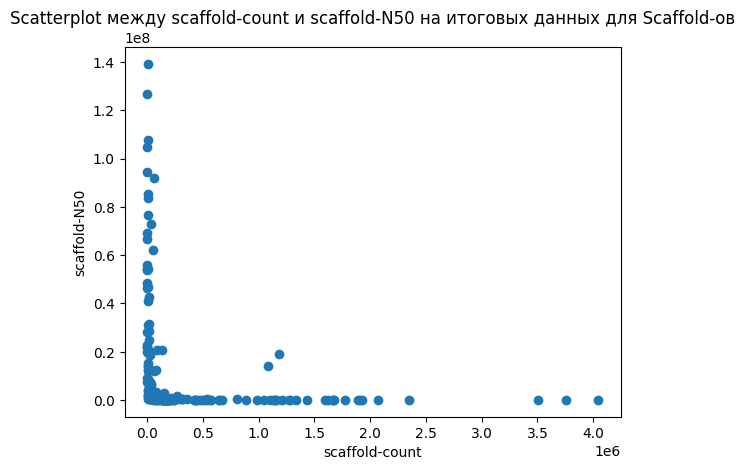

-0.28077658887587065


In [139]:
filtered_df_scaffold['scaffold-count'] = pd.to_numeric(filtered_df_scaffold['scaffold-count'], errors='coerce')
filtered_df_scaffold['scaffold-N50'] = pd.to_numeric(filtered_df_scaffold['scaffold-N50'], errors='coerce')

correlation = filtered_df_scaffold['scaffold-count'].corr(filtered_df_scaffold['scaffold-N50'])

import matplotlib.pyplot as plt

filtered_df_scaffold['scaffold-count'] = pd.to_numeric(filtered_df_scaffold['scaffold-count'], errors='coerce')
filtered_df_scaffold['scaffold-N50'] = pd.to_numeric(filtered_df_scaffold['scaffold-N50'], errors='coerce')


plt.scatter(filtered_df_scaffold['scaffold-count'], filtered_df_scaffold['scaffold-N50'])
plt.title('Scatterplot между scaffold-count и scaffold-N50 на итоговых данных для Scaffold-ов')
plt.xlabel('scaffold-count')
plt.ylabel('scaffold-N50')
plt.show()

print(correlation)

In [140]:
filtered_df_сhromosome = main_df.copy()
filtered_df_сhromosome = filtered_df_сhromosome[filtered_df_сhromosome['assembly_level'] == 'Chromosome']

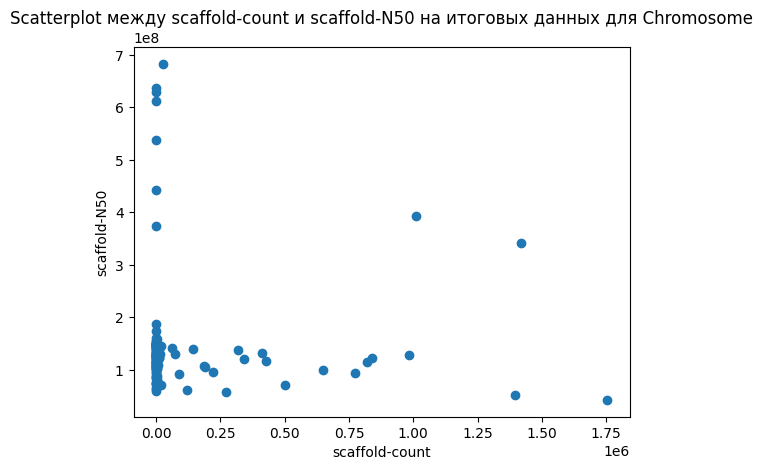

-0.011152959936742663


In [141]:
filtered_df_сhromosome['scaffold-count'] = pd.to_numeric(filtered_df_сhromosome['scaffold-count'], errors='coerce')
filtered_df_сhromosome['scaffold-N50'] = pd.to_numeric(filtered_df_сhromosome['scaffold-N50'], errors='coerce')

correlation = filtered_df_сhromosome['scaffold-count'].corr(filtered_df_сhromosome['scaffold-N50'])

import matplotlib.pyplot as plt

filtered_df_сhromosome['scaffold-count'] = pd.to_numeric(filtered_df_сhromosome['scaffold-count'], errors='coerce')
filtered_df_сhromosome['scaffold-N50'] = pd.to_numeric(filtered_df_сhromosome['scaffold-N50'], errors='coerce')


plt.scatter(filtered_df_сhromosome['scaffold-count'], filtered_df_сhromosome['scaffold-N50'])
plt.title('Scatterplot между scaffold-count и scaffold-N50 на итоговых данных для Сhromosome')
plt.xlabel('scaffold-count')
plt.ylabel('scaffold-N50')
plt.show()

print(correlation)

In [142]:
filtered_df_сontig = main_df.copy()
filtered_df_сontig = filtered_df_сontig[filtered_df_сontig['assembly_level'] == 'Contig']

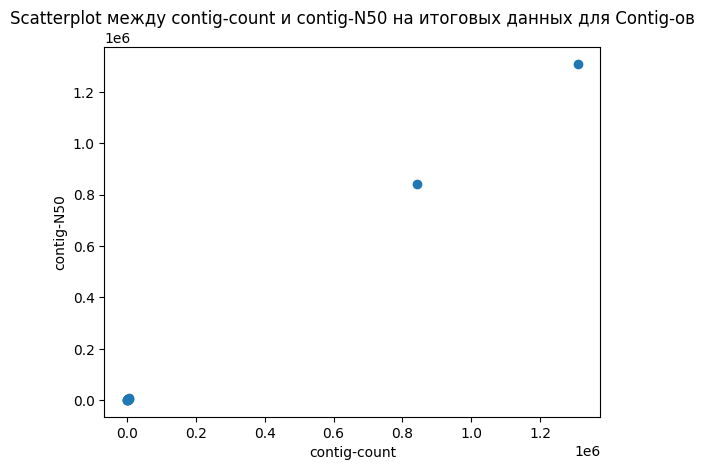

1.0


In [143]:
filtered_df_сontig['contig-count'] = pd.to_numeric(filtered_df_сontig['contig-count'], errors='coerce')
filtered_df_сontig['contig-N50'] = pd.to_numeric(filtered_df_сontig['contig-N50'], errors='coerce')

correlation = filtered_df_сontig['contig-count'].corr(filtered_df_сontig['contig-N50'])

import matplotlib.pyplot as plt

filtered_df_сontig['contig-count'] = pd.to_numeric(filtered_df_сontig['contig-count'], errors='coerce')
filtered_df_сontig['contig-N50'] = pd.to_numeric(filtered_df_сontig['contig-N50'], errors='coerce')


plt.scatter(filtered_df_сontig['contig-count'], filtered_df_сontig['contig-N50'])
plt.title('Scatterplot между сontig-count и сontig-N50 на итоговых данных для Contig-ов')
plt.xlabel('contig-count')
plt.ylabel('contig-N50')
plt.show()

print(correlation)

In [144]:
main_df['spanned-gaps'].value_counts()

spanned-gaps
0.0        14
39.0        4
38.0        2
26.0        2
117.0       2
           ..
293.0       1
197.0       1
50623.0     1
53227.0     1
3229.0      1
Name: count, Length: 277, dtype: int64

In [145]:
#main_df['spanned-gaps'] = pd.to_numeric(main_df['spanned-gaps'])
#main_df['spanned-gaps'] = pd.to_numeric(main_df['spanned-gaps'], errors='coerce')
for i in range (len(main_df)):
    print(main_df['spanned-gaps'][i])

22.0
89.0
197572.0
57878.0
49306.0
702289.0
67180.0
169.0
3179.0
16130.0
618.0
75403.0
105083.0
26003.0
233.0
607.0
7253.0
1129.0
325.0
8793.0
3.0
840.0
1672.0
32173.0
1177.0
867.0
30896.0
38.0
2192.0
646.0
386.0
13217.0
152.0
748.0
557.0
3486.0
1165.0
38725.0
32015.0
2345.0
93.0
279195.0
19461.0
0.0
6.0
3492.0
3864.0
3320.0
57013.0
58460.0
170.0
0.0
65319.0
884.0
837.0
1064.0
2637.0
532.0
60547.0
3.0
3201.0
695.0
975.0
343.0
40.0
99.0
127672.0
78817.0
1239.0
100957.0
36822.0
45490.0
1886.0
457.0
53490.0
72900.0
27578.0
44.0
6459.0
771.0
431.0
0.0
23544.0
968.0
611.0
173013.0
6392.0
83033.0
6223.0
96.0
270406.0
154908.0
17331.0
142709.0
75.0
1418.0
6286.0
14624.0
277.0
3760.0
0.0
279.0
17275.0
39.0
293.0
197.0
50623.0
53227.0
10685.0
38.0
63300.0
39852.0
15691.0
39.0
117.0
10815.0
10387.0
110424.0
276.0
663.0
12662.0
55185.0
1506.0
824.0
1098.0
142259.0
5072.0
190213.0
143.0
16371.0
193.0
210.0
58924.0
10153.0
418.0
216933.0
98906.0
116267.0
0.0
93514.0
185.0
60649.0
78682.0
605.0
203.

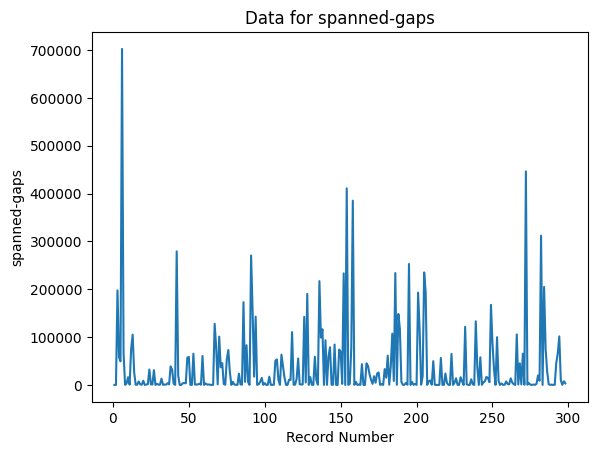

In [146]:
import pandas as pd
import matplotlib.pyplot as plt

#создаем пример данных

#df = pd.DataFrame(data)

x = range(1, len(main_df) + 1)
y = main_df['spanned-gaps']

plt.plot(x, y)
plt.xlabel('Record Number')
plt.ylabel('spanned-gaps')
plt.title('Data for spanned-gaps')
plt.show()

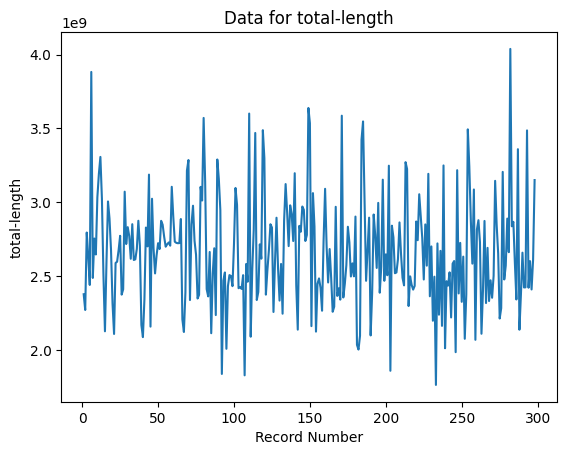

In [149]:
import matplotlib.pyplot as plt

x = range(1, len(main_df) + 1)
y = main_df['total-length']

plt.plot(x, y)
plt.xlabel('Record Number')
plt.ylabel('total-length')
plt.title('Data for total-length')
plt.show()